In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io

In [3]:
data = pd.read_csv('New_York_City_Leading_Causes_of_Death (5).csv')

In [5]:
print(data.head(10))

   Year                                      Leading Cause Sex  \
0  2007  Essential Hypertension and Renal Diseases (I10...   M   
1  2007  Accidents Except Drug Posioning (V01-X39, X43,...   F   
2  2007  Certain Conditions originating in the Perinata...   F   
3  2007            Influenza (Flu) and Pneumonia (J09-J18)   F   
4  2007            Influenza (Flu) and Pneumonia (J09-J18)   F   
5  2007  Human Immunodeficiency Virus Disease (HIV: B20...   M   
6  2007          Cerebrovascular Disease (Stroke: I60-I69)   F   
7  2007                               Septicemia (A40-A41)   F   
8  2007  Essential Hypertension and Renal Diseases (I10...   F   
9  2007               Aortic Aneurysm and Dissection (I71)   F   

               Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
0          Black Non-Hispanic    137       16.1                      22  
1          White Non-Hispanic    162       11.3                     7.3  
2       Other Race/ Ethnicity      .          .    

In [7]:
# Drop rows with missing data
data = data.dropna()

In [8]:
data = data[~data.eq('.').any(axis=1)]

In [13]:
data['Deaths'] = pd.to_numeric(data['Deaths']).round(2)

In [14]:
data['Death Rate'] = pd.to_numeric(data['Death Rate']).round(2)
data['Age Adjusted Death Rate'] = pd.to_numeric(data['Age Adjusted Death Rate']).round(2)

In [16]:
data.to_csv('modified_data.csv', index=False)

In [71]:
print(data.head(50))

    Year                                      Leading Cause Sex  \
0   2007         Essential Hypertension and Renal Diseases    M   
1   2007                   Accidents Except Drug Posioning    F   
2   2007              Human Immunodeficiency Virus Disease    M   
3   2007                                        Septicemia    F   
4   2007         Essential Hypertension and Renal Diseases    F   
5   2007                                   All Other Causes   M   
6   2007                               Malignant Neoplasms    F   
7   2007       Nephritis, Nephrotic Syndrome and Nephrisis    F   
8   2007                           Cerebrovascular Disease    M   
9   2007                           Cerebrovascular Disease    F   
10  2007              Human Immunodeficiency Virus Disease    M   
11  2007                                        Septicemia    F   
12  2007              Human Immunodeficiency Virus Disease    F   
13  2007                               Alzheimer's Disease    

In [30]:
data.to_csv('modified_data.csv', index=False)

print('Modified data saved to modified_data.csv')

Modified data saved to modified_data.csv


In [33]:
null_exists = data.isnull().any().any()

print("\nAre there any null or NaN values in the DataFrame?")
print("Yes" if null_exists else "No")



Are there any null or NaN values in the DataFrame?
No


In [39]:


# Remove parentheses and their contents from 'Leading Cause' column
data['Leading Cause'] = data['Leading Cause'].str.replace(r"\(.*\)", "")

# Write modified data to new CSV file
data.to_csv('modified_data.csv', index=False)

print('Modified data saved to modified_data.csv')


Modified data saved to modified_data.csv


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_16416\200697925.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Leading Cause'] = data['Leading Cause'].str.replace(r"\(.*\)", "")


In [40]:
print(data.head(50))


    Year                                      Leading Cause Sex  \
0   2007         Essential Hypertension and Renal Diseases    M   
1   2007                   Accidents Except Drug Posioning    F   
2   2007              Human Immunodeficiency Virus Disease    M   
3   2007                                        Septicemia    F   
4   2007         Essential Hypertension and Renal Diseases    F   
5   2007                                   All Other Causes   M   
6   2007                               Malignant Neoplasms    F   
7   2007       Nephritis, Nephrotic Syndrome and Nephrisis    F   
8   2007                           Cerebrovascular Disease    M   
9   2007                           Cerebrovascular Disease    F   
10  2007              Human Immunodeficiency Virus Disease    M   
11  2007                                        Septicemia    F   
12  2007              Human Immunodeficiency Virus Disease    F   
13  2007                               Alzheimer's Disease    

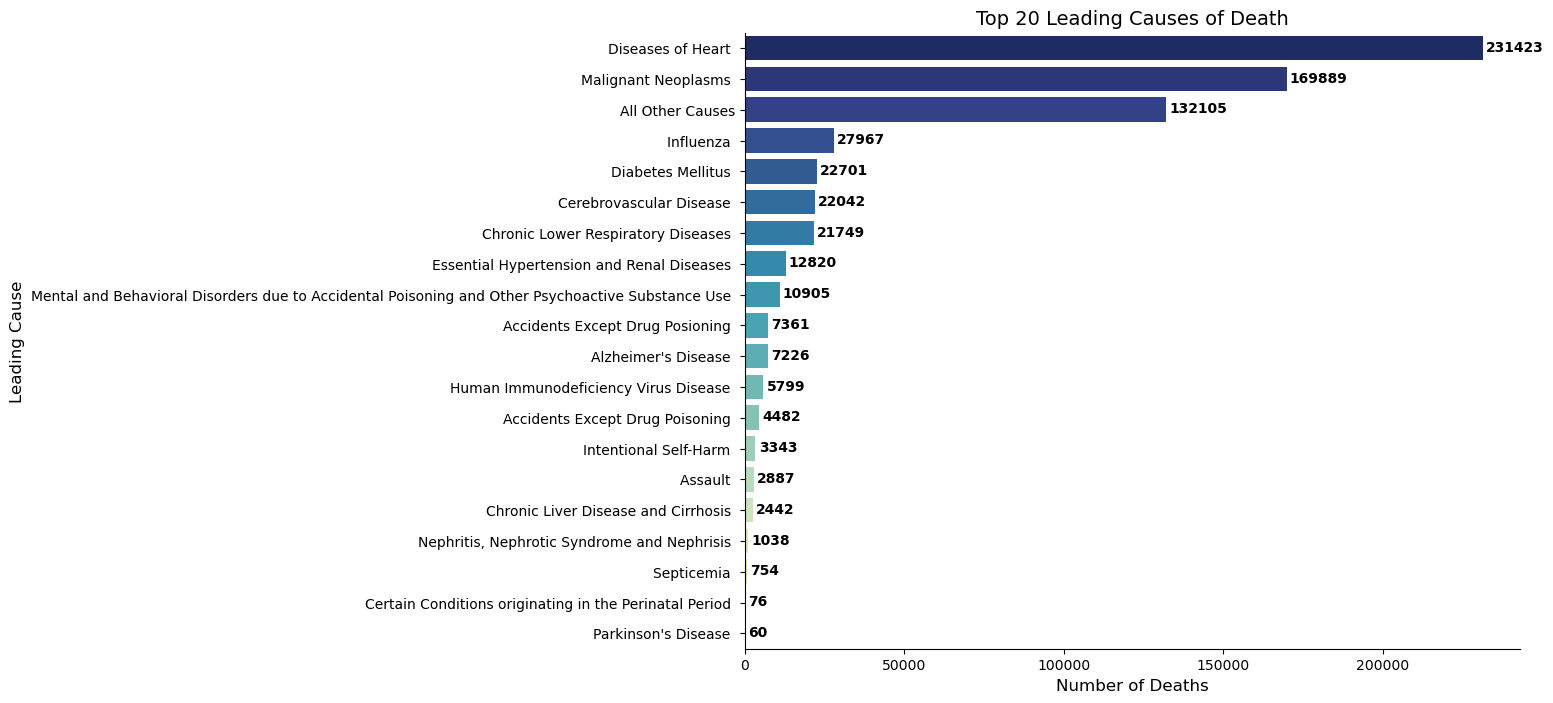

In [43]:
# Group the data by leading cause and sum the number of deaths for each cause
grouped_data = data.groupby('Leading Cause')['Deaths'].sum().reset_index()

# Sort the data by the number of deaths in descending order and select the top 20 causes
top_20 = grouped_data.sort_values('Deaths', ascending=False).head(20)

# Create a horizontal bar chart to visualize the top 20 causes by number of deaths
plt.figure(figsize=(10, 8))

# Use seaborn to create a color gradient for the bars
colors = sns.color_palette('YlGnBu_r', n_colors=len(top_20))
sns.barplot(x='Deaths', y='Leading Cause', data=top_20, palette=colors)

# Add labels and titles
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Leading Cause', fontsize=12)
plt.title('Top 20 Leading Causes of Death', fontsize=14)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Add values to the bars
for i, v in enumerate(top_20['Deaths']):
    plt.text(v + 1000, i + 0.1, str(v), color='black', fontweight='bold')

plt.show()

<Figure size 1000x800 with 0 Axes>

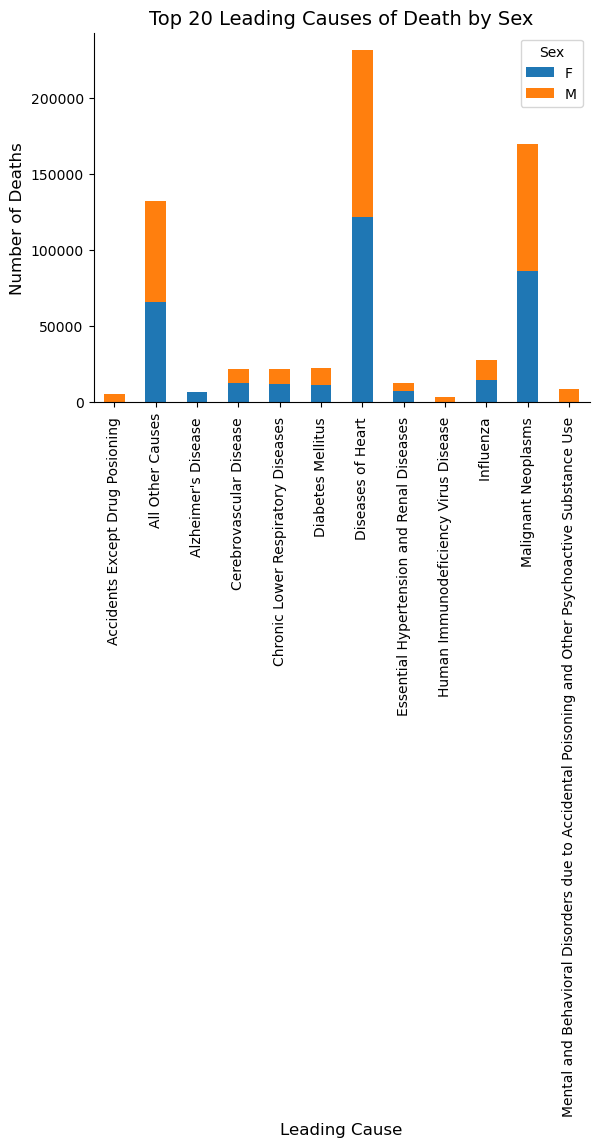

In [51]:

# Group the data by leading cause and sex, and sum the number of deaths for each cause
grouped_data = data.groupby(['Leading Cause', 'Sex'])['Deaths'].sum().reset_index()

# Sort the data by the number of deaths in descending order and select the top 20 causes
top_20 = grouped_data.sort_values(['Deaths'], ascending=False).head(20)

# Pivot the data to create a stacked bar chart
stacked_data = top_20.pivot(index='Leading Cause', columns='Sex', values='Deaths')

# Create a stacked bar chart of the top 20 leading causes of death by sex
plt.figure(figsize=(10, 8))
stacked_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and titles
plt.xlabel('Leading Cause', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Top 20 Leading Causes of Death by Sex', fontsize=14)

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.show()


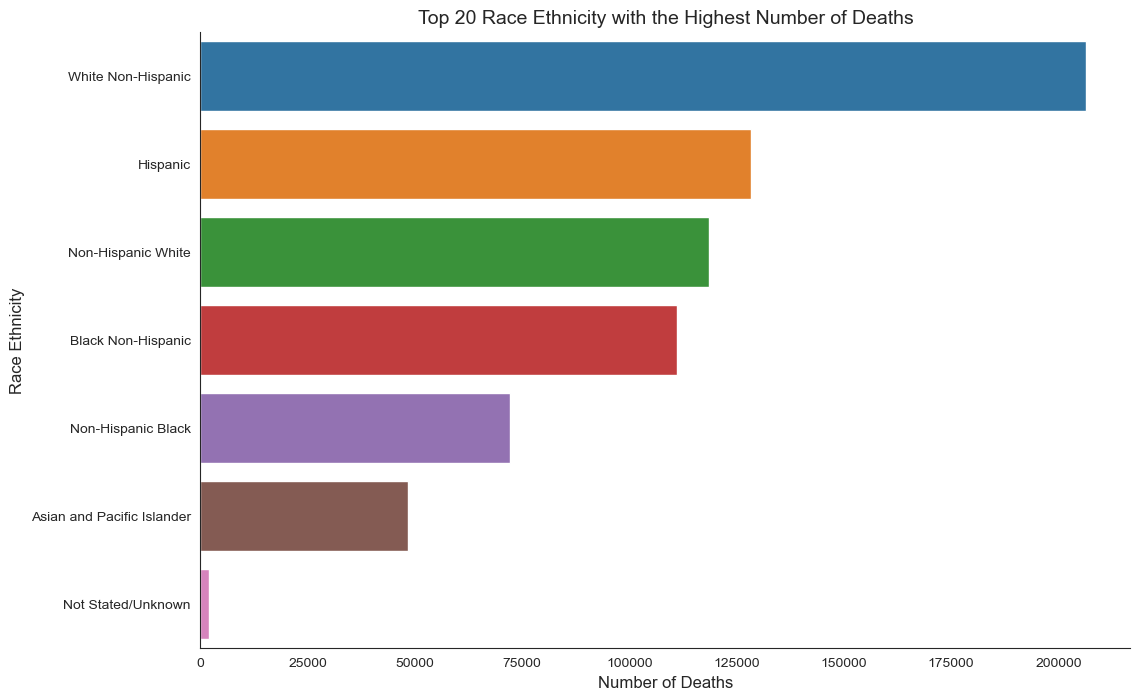

In [73]:
# Group the data by race ethnicity and sum the number of deaths for each race ethnicity
grouped_data = data.groupby('Race Ethnicity')['Deaths'].sum().reset_index()

# Sort the data by the number of deaths in descending order and select the top 20 race ethnicity
top_20 = grouped_data.sort_values('Deaths', ascending=False).head(20)

# Create a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a horizontal bar chart of the top 20 race ethnicity with the highest number of deaths
plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='Race Ethnicity', data=top_20, palette=colors)

# Add labels and title
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Race Ethnicity', fontsize=12)
plt.title('Top 20 Race Ethnicity with the Highest Number of Deaths', fontsize=14)

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.show()

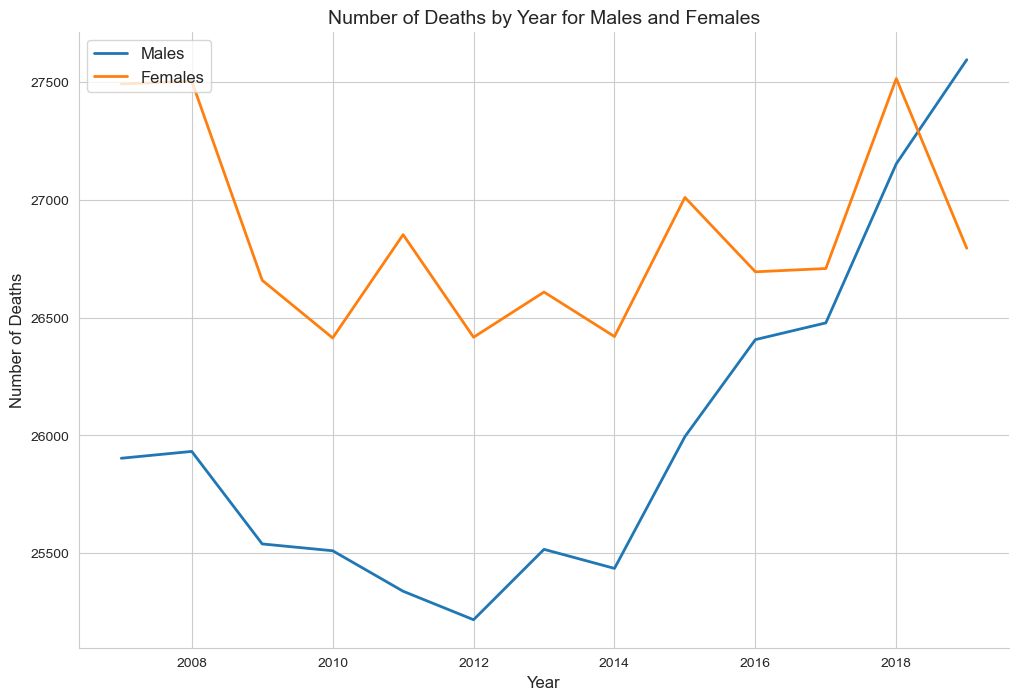

In [64]:
# Group the data by year and sex, and sum the number of deaths for each year and sex
grouped_data = data.groupby(['Year', 'Sex'])['Deaths'].sum().reset_index()

# Filter the data for the sex with the highest number of deaths
top_sex = grouped_data.groupby('Sex')['Deaths'].sum().idxmax()
male_data = grouped_data[grouped_data['Sex'] == 'M']
female_data = grouped_data[grouped_data['Sex'] == 'F']

# Create a double line chart of the number of deaths by year for both males and females
plt.figure(figsize=(12, 8))
plt.plot(male_data['Year'], male_data['Deaths'], color='#1f77b4', linewidth=2, label='Males')
plt.plot(female_data['Year'], female_data['Deaths'], color='#ff7f0e', linewidth=2, label='Females')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Number of Deaths by Year for Males and Females', fontsize=14)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Remove the top and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

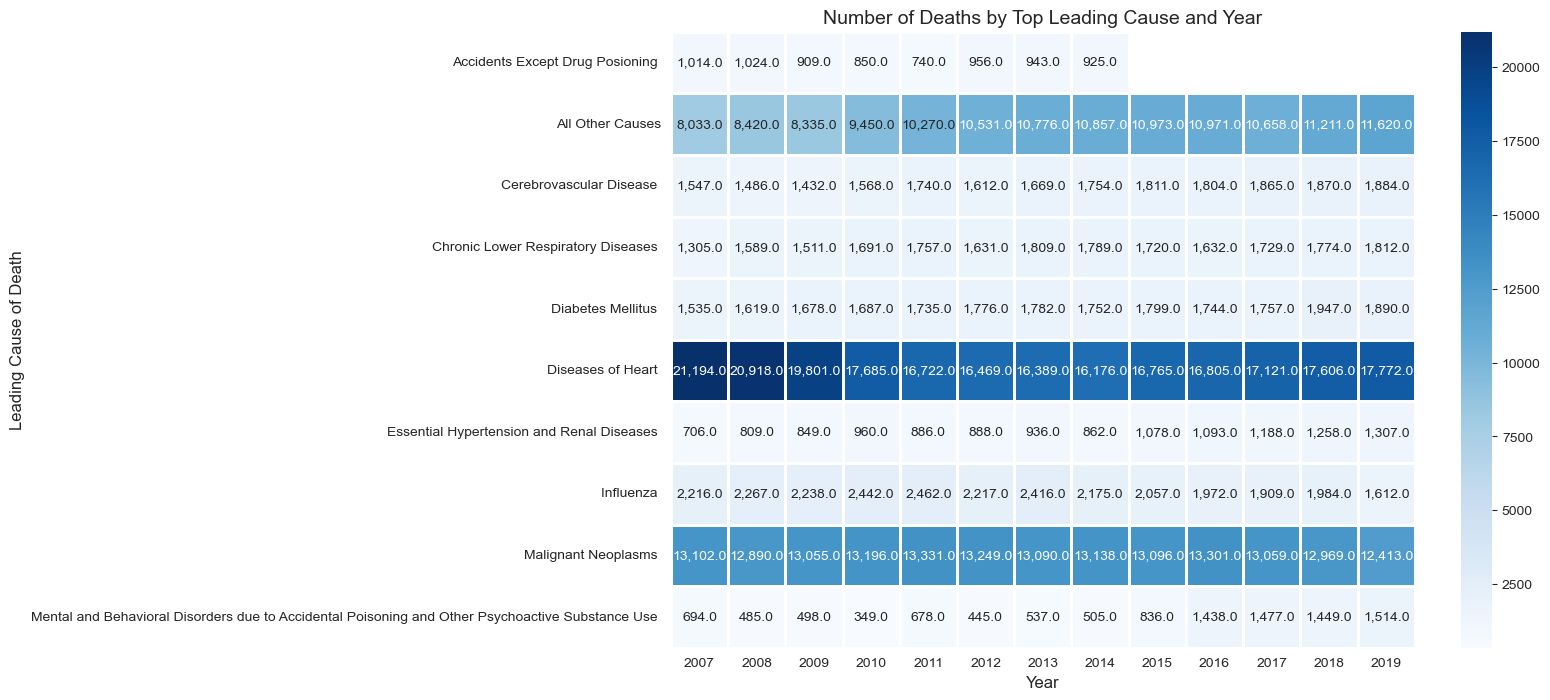

In [65]:
# Select the top leading causes of death
top_causes = data['Leading Cause'].value_counts().head(10).index

# Filter the data for the top leading causes and group it by year
filtered_data = data[data['Leading Cause'].isin(top_causes)].groupby(['Leading Cause', 'Year'])['Deaths'].sum().reset_index()

# Pivot the data to create a heatmap
heatmap_data = filtered_data.pivot('Leading Cause', 'Year', 'Deaths')

# Create a heatmap of the number of deaths by top leading cause and year
plt.figure(figsize=(12, 8))
sns.set_style('white')
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=',', linewidths=1)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leading Cause of Death', fontsize=12)
plt.title('Number of Deaths by Top Leading Cause and Year', fontsize=14)

plt.show()

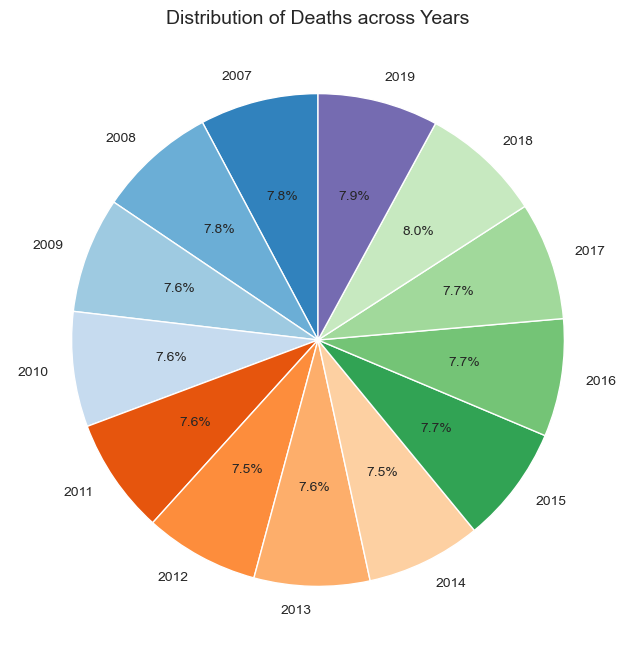

In [68]:


# Group the data by year and sum the number of deaths for each year
grouped_data = data.groupby('Year')['Deaths'].sum().reset_index()

# Sort the data by year in ascending order
sorted_data = grouped_data.sort_values('Year', ascending=True)

# Create a pie chart of the distribution of deaths across years
plt.figure(figsize=(8, 8))
plt.pie(sorted_data['Deaths'], labels=sorted_data['Year'], autopct='%1.1f%%', colors=plt.cm.tab20c(range(len(sorted_data))), startangle=90)

# Add title
plt.title('Distribution of Deaths across Years', fontsize=14)

plt.show()


In [69]:


# Write the DataFrame to a CSV file
data.to_csv('your_output_file.csv', index=False)

# Print a message indicating that the file has been saved
print('File saved successfully.')


File saved successfully.


In [70]:
import os

print(os.getcwd())


C:\Users\Mohammad
